We have a model with fear, but the rate of people stopping being scared is the constant H, we can change that



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline
# We fix a population value N

N = 1000

# Initial number of infected with pathogen individuals, IP0.
IP0 = 1
# All the other individuals start in S0
S0 = N - IP0
IPF0, IF0, RPF0, RF0, R0 = 0, 0, 0, 0, 0

#parameters
#we need to set the parameters alpha, beta, H, lambda_F, lambda_PF, lambda_P
"""
lambda_F = 1 / 15
lambda_PF = 1 / 15
lambda_P = 1 / 15
alpha = 0.00020
beta = 0.00020
"""
a = 200
b = 8

def derivative(y, t, lambda_F,lambda_PF, lambda_P, alpha, beta):
    #we have 7 dependent variables, S, I_F, I_P, I_PF, R_F, R_PF, R
    H = min(1, (t / a) ** b)
    S, I_F, I_P, I_PF, R_F, R_PF, R = y
    dydt = [
        -beta * (1 - alpha) * S * I_P - (1 - beta) * alpha * S * I_P - beta * alpha * S * I_F - alpha * S * I_F - beta * (1 - alpha) * S * I_PF - (1 - beta) * alpha * S * I_PF \
        - beta * alpha * S * I_PF + H * R_F,
        (1 - beta) * alpha * S * I_P + alpha * S * I_F + (1 - beta) * alpha * S * I_PF - beta * I_F * I_P - beta * I_F * I_PF - lambda_F * I_F,
        beta * (1 - beta) * S * I_P + beta * (1 - alpha) * S * I_PF - alpha * I_P * I_P - alpha * I_P * I_F - alpha * I_P * I_PF - lambda_P * I_P + H * R_PF,
        beta * alpha * S * I_P + beta * alpha * S * I_PF + beta * I_F * I_P + beta * I_F * I_PF + alpha * I_P * I_P + alpha * I_P * I_F + alpha * I_P * I_PF \
        - lambda_P * I_PF - lambda_PF * I_PF,
        lambda_F * I_F - H * R_F,
        lambda_PF * I_PF - lambda_P * R_PF - H * R_PF,
        lambda_P * I_P + lambda_P * I_PF + lambda_P * R_PF
    ]
    #print("dydt",dydt)
    return dydt

#y0 is vector of initial conditions
y0 = [S0, IF0, IP0, IPF0, RF0, RPF0, R0]

#grid for solving
#grid for solving
t = np.linspace(0,300, 300)
sol = odeint(derivative, y0, t, args=(1 / 15, 1/15, 1/15, 0, 0.00016))





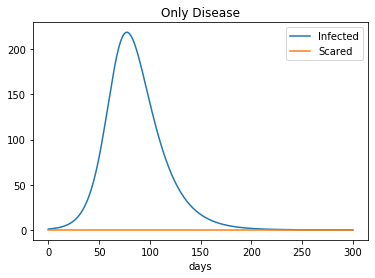

In [2]:
#plt.plot(t, sol[:, 0], label='S')
#plt.plot(t, sol[:, 1], label='I_F')
#plt.plot(t, sol[:, 2], label='I_P')
infected = sol[:,2] + sol[:,3]
plt.plot(t, infected, label='Infected')
#plt.plot(t, sol[:, 3], label='I_PF')
#plt.plot(t, sol[:, 4], label='R_F')
#plt.plot(t, sol[:, 5], label='R_PF')
scared = sol[:,1] + sol[:,3]
plt.plot(t, scared, label='Scared')
#plt.plot(t, sol[:, 6], label='R')
plt.legend(loc='best')
plt.xlabel('days')
plt.title("Only Disease")
plt.savefig("Only Disease Dynamic")

plt.show()



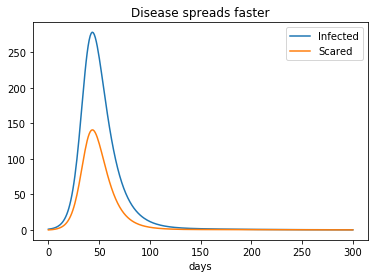

In [3]:
t = np.linspace(0,300, 300)
sol = odeint(derivative, y0, t, args=(1 / 15, 1/15, 1/15, 0.00008, 0.00024))


#plt.plot(t, sol[:, 0], label='S')
#plt.plot(t, sol[:, 1], label='I_F')
#plt.plot(t, sol[:, 2], label='I_P')
infected = sol[:,2] + sol[:,3]
plt.plot(t, infected, label='Infected')
#plt.plot(t, sol[:, 3], label='I_PF')
#plt.plot(t, sol[:, 4], label='R_F')
#plt.plot(t, sol[:, 5], label='R_PF')
scared = sol[:,1] + sol[:,3]
plt.plot(t, scared, label='Scared')
#plt.plot(t, sol[:, 6], label='R')
plt.legend(loc='best')
plt.xlabel('days')
plt.title("Disease spreads faster")
plt.savefig("Disease spreads faster dynamic")

plt.show()



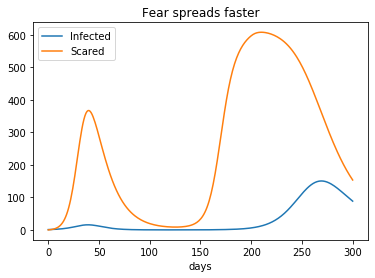

In [4]:
t = np.linspace(0,300, 300)
sol = odeint(derivative, y0, t, args=(1 / 15, 1/15, 1/15, 0.00024, 0.00016))


#plt.plot(t, sol[:, 0], label='S')
#plt.plot(t, sol[:, 1], label='I_F')
#plt.plot(t, sol[:, 2], label='I_P')
infected = sol[:,2] + sol[:,3]
plt.plot(t, infected, label='Infected')
#plt.plot(t, sol[:, 3], label='I_PF')
#plt.plot(t, sol[:, 4], label='R_F')
#plt.plot(t, sol[:, 5], label='R_PF')
scared = sol[:,1] + sol[:,3]
plt.plot(t, scared, label='Scared')
#plt.plot(t, sol[:, 6], label='R')
plt.legend(loc='best')
plt.xlabel('days')
plt.title("Fear spreads faster")
plt.savefig("Fear spreads faster dynamic")
plt.show()

t = np.linspace(0,300, 300)
sol = odeint(derivative, y0, t, args=(1 / 15, 1/15,1/15, 0.00016, 0.00016))


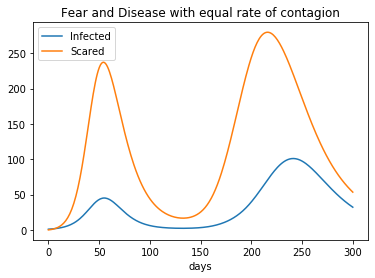

In [5]:
#plt.plot(t, sol[:, 0], label='S')
#plt.plot(t, sol[:, 1], label='I_F')
#plt.plot(t, sol[:, 2], label='I_P')
infected = sol[:,2] + sol[:,3]
plt.plot(t, infected, label='Infected')
#plt.plot(t, sol[:, 3], label='I_PF')
#plt.plot(t, sol[:, 4], label='R_F')
#plt.plot(t, sol[:, 5], label='R_PF')
scared = sol[:,1] + sol[:,3]
plt.plot(t, scared, label='Scared')
#plt.plot(t, sol[:, 6], label='R')
plt.legend(loc='best')
plt.xlabel('days')
plt.title("Fear and Disease with equal rate of contagion")
plt.savefig("Fear and Disease with equal rate of contagion dynamic")

plt.show()



